In [1]:
import mne
import matplotlib.pyplot as plt

filePath = "Subject3,Session1,Block1Recording_FLEX2_213075_2024.05.07T12.16.39.07.00.md.edf"
raw = mne.io.read_raw_edf(filePath, preload=True)

Extracting EDF parameters from /Users/steven/GitHub/stimulus-emotiv/Subject3,Session1,Block1Recording_FLEX2_213075_2024.05.07T12.16.39.07.00.md.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 37631  =      0.000 ...   146.996 secs...


/var/folders/qz/m8h8vn3j76z6q1nh102y2d240000gn/T/ipykernel_11432/1534243916.py:5: RuntimeWarning: Omitted 3 annotation(s) that were outside data range.
  raw = mne.io.read_raw_edf(filePath, preload=True)


In [3]:
raw.info

Measurement date,"May 07, 2024 12:16:39 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,127 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.00 Hz
Lowpass,128.00 Hz


Using matplotlib as 2D backend.


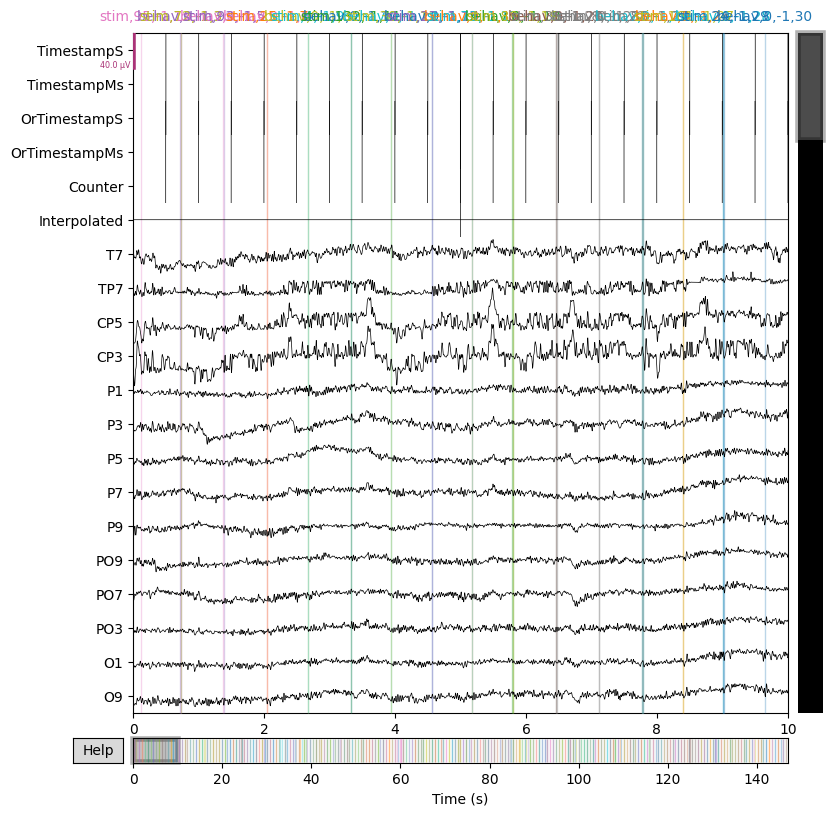

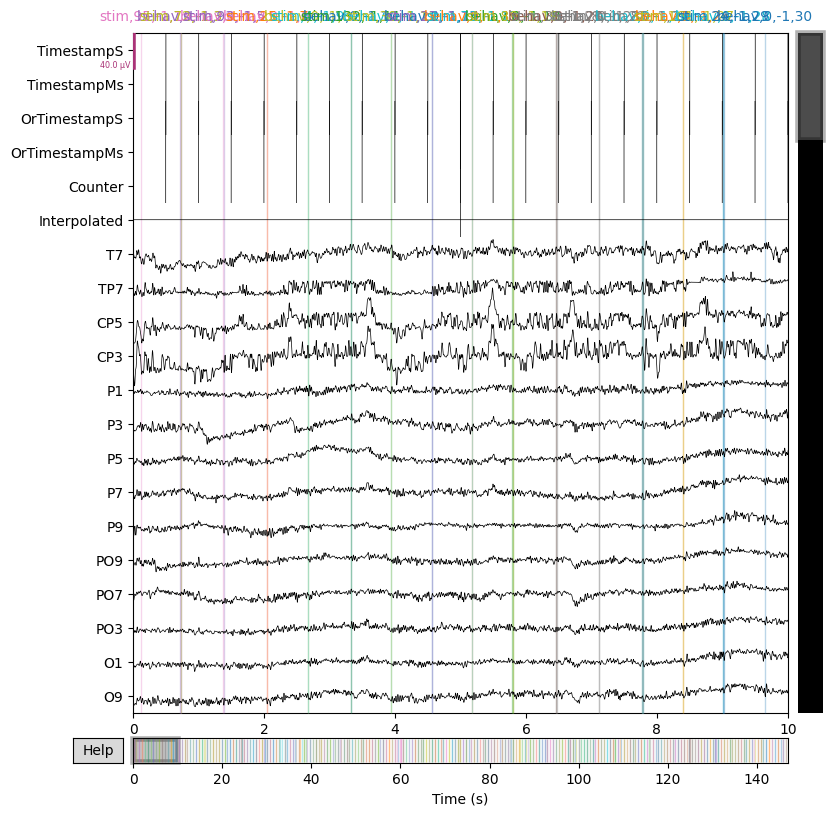

In [3]:
raw.plot()

In [4]:
events, event_id = mne.events_from_annotations(raw)
stim_event_ids = {key: value for key, value in event_id.items() if key.startswith('stim')}
epochs = mne.Epochs(raw, events, event_id=stim_event_ids, tmin=-0.05, tmax=0.60, preload=True)


Used Annotations descriptions: ['behav,0,-1,10', 'behav,0,-1,101', 'behav,0,-1,105', 'behav,0,-1,107', 'behav,0,-1,109', 'behav,0,-1,111', 'behav,0,-1,115', 'behav,0,-1,119', 'behav,0,-1,12', 'behav,0,-1,123', 'behav,0,-1,125', 'behav,0,-1,127', 'behav,0,-1,129', 'behav,0,-1,131', 'behav,0,-1,133', 'behav,0,-1,135', 'behav,0,-1,137', 'behav,0,-1,139', 'behav,0,-1,14', 'behav,0,-1,141', 'behav,0,-1,143', 'behav,0,-1,147', 'behav,0,-1,149', 'behav,0,-1,151', 'behav,0,-1,153', 'behav,0,-1,155', 'behav,0,-1,157', 'behav,0,-1,159', 'behav,0,-1,16', 'behav,0,-1,161', 'behav,0,-1,163', 'behav,0,-1,165', 'behav,0,-1,167', 'behav,0,-1,169', 'behav,0,-1,171', 'behav,0,-1,173', 'behav,0,-1,175', 'behav,0,-1,179', 'behav,0,-1,18', 'behav,0,-1,181', 'behav,0,-1,183', 'behav,0,-1,187', 'behav,0,-1,189', 'behav,0,-1,191', 'behav,0,-1,193', 'behav,0,-1,195', 'behav,0,-1,197', 'behav,0,-1,199', 'behav,0,-1,2', 'behav,0,-1,20', 'behav,0,-1,201', 'behav,0,-1,203', 'behav,0,-1,205', 'behav,0,-1,207', 'beh

Using matplotlib as 2D backend.


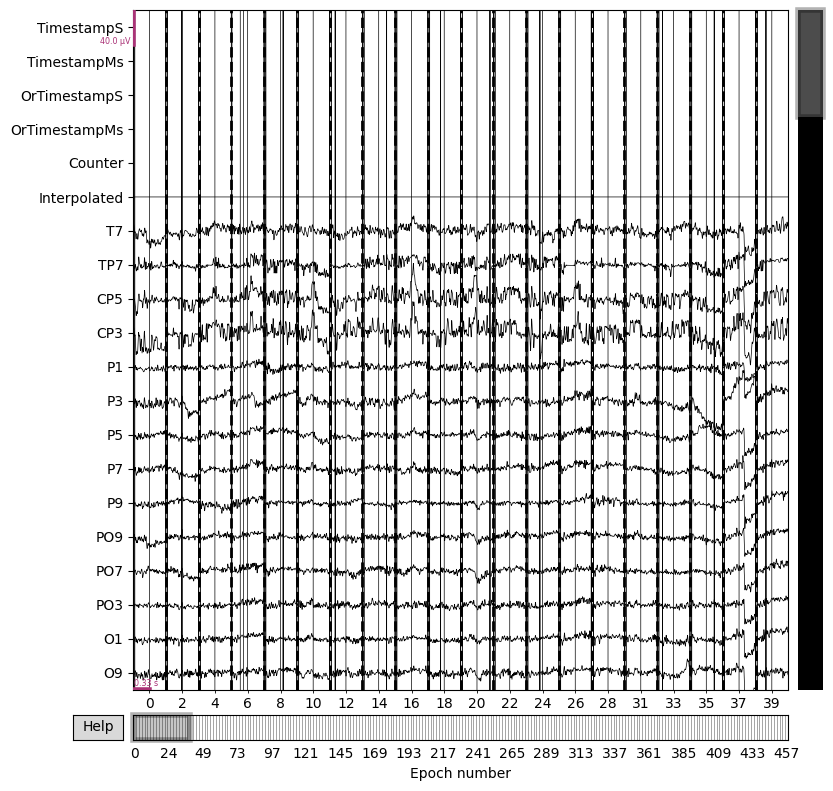

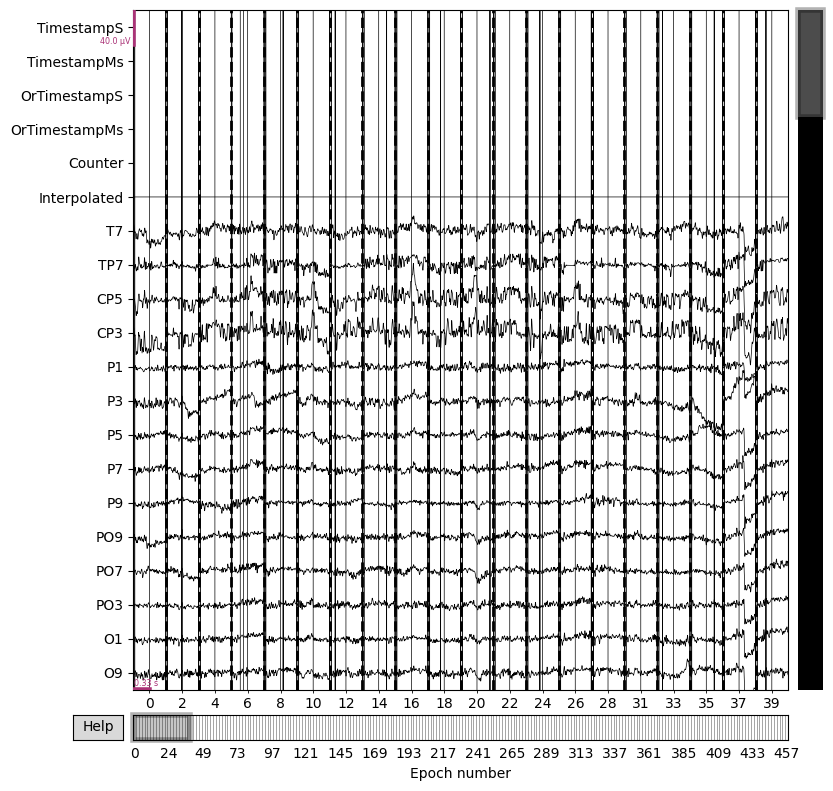

In [5]:
epochs.plot()

In [56]:
epochs

Number of events,5
Events,"stim,2349,-1,9: 1stim,28367,-1,1: 1stim,291560,-1,11: 0stim,352861,-1,5: 1stim,359687,-1,7: 1stim,87146,-1,3: 1"
Time range,-0.047 – 0.602 s
Baseline,-0.047 – 0.000 s


In [6]:
print("Channels:", raw.ch_names)

Channels: ['TimestampS', 'TimestampMs', 'OrTimestampS', 'OrTimestampMs', 'Counter', 'Interpolated', 'T7', 'TP7', 'CP5', 'CP3', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO9', 'PO7', 'PO3', 'O1', 'O9', 'Pz', 'POz', 'Oz', 'Iz', 'O10', 'O2', 'PO4', 'PO8', 'PO10', 'P10', 'P8', 'P6', 'P4', 'P2', 'CP4', 'CP6', 'TP8', 'T8', 'RawCq', 'Battery', 'BatteryPercent', 'FwBufferSize', 'FwClockTime', 'MarkerHardware', 'CQ.T7', 'CQ.TP7', 'CQ.CP5', 'CQ.CP3', 'CQ.P1', 'CQ.P3', 'CQ.P5', 'CQ.P7', 'CQ.P9', 'CQ.PO9', 'CQ.PO7', 'CQ.PO3', 'CQ.O1', 'CQ.O9', 'CQ.Pz', 'CQ.POz', 'CQ.Oz', 'CQ.Iz', 'CQ.O10', 'CQ.O2', 'CQ.PO4', 'CQ.PO8', 'CQ.PO10', 'CQ.P10', 'CQ.P8', 'CQ.P6', 'CQ.P4', 'CQ.P2', 'CQ.CP4', 'CQ.CP6', 'CQ.TP8', 'CQ.T8', 'CQ.Overall', 'EQ.SampleRateQua', 'EQ.OVERALL', 'EQ.T7', 'EQ.TP7', 'EQ.CP5', 'EQ.CP3', 'EQ.P1', 'EQ.P3', 'EQ.P5', 'EQ.P7', 'EQ.P9', 'EQ.PO9', 'EQ.PO7', 'EQ.PO3', 'EQ.O1', 'EQ.O9', 'EQ.Pz', 'EQ.POz', 'EQ.Oz', 'EQ.Iz', 'EQ.O10', 'EQ.O2', 'EQ.PO4', 'EQ.PO8', 'EQ.PO10', 'EQ.P10', 'EQ.P8', 'EQ.P6', 'EQ.P4

In [7]:
# List of channel names that are EEG electrodes
eeg_channels = [
    'T7', 'TP7', 'CP5', 'CP3', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO9', 'PO7', 'PO3',
    'O1', 'O9', 'Pz', 'POz', 'Oz', 'Iz', 'O10', 'O2', 'PO4', 'PO8', 'PO10', 'P10',
    'P8', 'P6', 'P4', 'P2', 'CP4', 'CP6', 'TP8', 'T8'
]

# Restrict data to only these EEG channels using the new recommended method
raw.pick(eeg_channels)

# Optionally, print the updated channel list to verify
print("Filtered Channels:", raw.ch_names)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtered Channels: ['T7', 'TP7', 'CP5', 'CP3', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO9', 'PO7', 'PO3', 'O1', 'O9', 'Pz', 'POz', 'Oz', 'Iz', 'O10', 'O2', 'PO4', 'PO8', 'PO10', 'P10', 'P8', 'P6', 'P4', 'P2', 'CP4', 'CP6', 'TP8', 'T8']


In [58]:
from pycocotools.coco import COCO

coco.getImgIds()


NameError: name 'coco' is not defined

In [ ]:
from scipy.io import loadmat
import h5py
import numpy as np
import pandas as pd
from PIL import Image
from IPython.display import display

EXP_PATH = "stimulus/nsd_expdesign.mat"
IMAGE_PATH = "stimulus/nsd_stimuli.hdf5"
COCO_MAP = "stimulus/nsd_stim_info_merged.pkl"


def getImages(subj, session, n_images, num_blocks):
    totalImages = n_images * num_blocks
    # Mapping from integer id to NSD id
    mat = loadmat(EXP_PATH)
    subjectim = mat['subjectim'] # 1-indexed
    sessionGroup = (int(session)-1) % 3
    image_indices = subjectim[int(subj)-1][sessionGroup*totalImages : (sessionGroup + 1)*totalImages]
    image_indices = image_indices -1 # img_map is 1-indexed
    sorted_indices = np.argsort(image_indices)
    inverse_indices = np.argsort(sorted_indices)  # To revert back to original order

    # Mapping from NSD id to coco id
    df = pd.read_pickle(COCO_MAP)
    coco_ids = df.iloc[image_indices]['cocoId'].values

    with h5py.File(IMAGE_PATH, 'r') as file:
        dataset = file["imgBrick"]
        sorted_images = dataset[image_indices[sorted_indices], :, :, :]  # Assuming index is within the valid range for dataset # pyright: ignore
        images = sorted_images[inverse_indices]
        pil_images = [Image.fromarray(img) for img in images]

    for img in pil_images[:3]:
        print(img)

    return pil_images, coco_ids[inverse_indices]

getImages(1, 1, 208, 16)

<PIL.Image.Image image mode=RGB size=425x425 at 0x34DD5BC50>
<PIL.Image.Image image mode=RGB size=425x425 at 0x3494B3560>
<PIL.Image.Image image mode=RGB size=425x425 at 0x3231A1190>


([<PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image image mode=RGB size=425x425>,
  <PIL.Image.Image i

In [ ]:
df = pd.read_pickle(COCO_MAP)
df

,cocoId,cocoSplit,cropBox,loss,nsdId,flagged,BOLD5000,shared1000,subject1,subject2,...,subject5_rep2,subject6_rep0,subject6_rep1,subject6_rep2,subject7_rep0,subject7_rep1,subject7_rep2,subject8_rep0,subject8_rep1,subject8_rep2
0,532481,val2017,"(0, 0, 0.1671875, 0.1671875)",0.100000,0,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
1,245764,val2017,"(0, 0, 0.125, 0.125)",0.000000,1,False,False,False,0,0,...,0,0,0,0,13985,14176,28603,0,0,0
2,385029,val2017,"(0, 0, 0.125, 0.125)",0.000000,2,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
3,311303,val2017,"(0, 0, 0.16640625, 0.16640625)",0.125000,3,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
4,393226,val2017,"(0, 0, 0.125, 0.125)",0.133333,4,False,False,False,0,0,...,0,13720,22861,23023,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72995,518071,train2017,"(0, 0, 0.125, 0.125)",0.000000,72995,False,False,False,0,0,...,0,0,0,0,0,0,0,6083,11650,26531
72996,255930,train2017,"(0, 0, 0.125, 0.125)",0.125000,72996,False,False,False,0,0,...,0,0,0,0,0,0,0,10402,10434,10625
72997,255934,train2017,"(0, 0, 0.1, 0.1)",0.000000,72997,False,False,False,0,0,...,0,0,0,0,0,0,0,0,0,0
72998,518080,train2017,"(0.125, 0.125, 0, 0)",0.000000,72998,False,False,False,0,0,...,0,0,0,0,5585,11846,14495,0,0,0


In [ ]:
df[df['cocoId'] == 549301]

,cocoId,cocoSplit,cropBox,loss,nsdId,flagged,BOLD5000,shared1000,subject1,subject2,...,subject5_rep2,subject6_rep0,subject6_rep1,subject6_rep2,subject7_rep0,subject7_rep1,subject7_rep2,subject8_rep0,subject8_rep1,subject8_rep2
11159,549301,train2017,"(0, 0.25, 0, 0)",0.0,11159,False,True,True,1,1,...,2420,702,2319,2420,702,2319,2420,702,2319,2420


In [ ]:
subj = 1
session = 1
n_images = 208
num_blocks = 16

totalImages = n_images * num_blocks
# Mapping from integer id to NSD id
mat = loadmat(EXP_PATH)
subjectim = mat['subjectim'] # 1-indexed
sessionGroup = (int(session)-1) % 3
image_indices = subjectim[int(subj)-1][sessionGroup*totalImages : (sessionGroup + 1)*totalImages]
image_indices = image_indices -1 # img_map is 1-indexed
sorted_indices = np.argsort(image_indices)
inverse_indices = np.argsort(sorted_indices)  # To revert back to original order

# Mapping from NSD id to coco id
df = pd.read_pickle(COCO_MAP)
coco_ids = df.iloc[inverse_indices]['cocoId'].values

with h5py.File(IMAGE_PATH, 'r') as file:
    dataset = file["imgBrick"]
    sorted_images = dataset[image_indices[sorted_indices], :, :, :]  # Assuming index is within the valid range for dataset # pyright: ignore
    images = sorted_images[inverse_indices]
    pil_images = [Image.fromarray(img) for img in images]
# return pil_images, coco_ids[inverse_indices]

In [79]:
coco_ids = df.iloc[inverse_indices]['cocoId']
coco_ids.head()

86    253695
89    401446
91    319721
92    491757
95    192047
Name: cocoId, dtype: int64

In [80]:
coco_ids.values()

TypeError: 'numpy.ndarray' object is not callable

In [70]:
len(image_indices)
image_indices

array([ 2950,  2990,  3049, ..., 17513, 58671, 61414], dtype=int32)

In [74]:
coco_ids.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [67]:
len(sorted_indices)

3328

In [68]:
len(inverse_indices)

3328